1.Bootstrapping is a method where we take random samples from a data set, put the items back, and repeat this many times to study the variation in the data.
The standard deviation tells us how much the data varies from the average.The standard error of the mean reflects the precision of the sample mean as an estimate of the population mean. The standard deviation is larger than the standard error of the mean.


Here's a summary of our interactions related to your questions:

1. Difference Between Standard Error of the Mean and Standard Deviation

You asked about the difference between the standard error of the mean and the standard deviation of the original data. I explained that:

The standard deviation measures the variability or spread of individual data points in a dataset relative to the mean.
The standard error of the mean (SEM) measures the variability or uncertainty in the sample mean if we were to take multiple samples from the population. It is essentially the standard deviation of the sample means.
Thus, while the standard deviation describes the dispersion of data within a sample, the SEM reflects how precise our estimate of the population mean is based on that sample.

This summary captures the core of our discussion, but let me know if you need any adjustments or additional points.

https://chatgpt.com/share/66fc6a47-ea94-8007-850d-e1acc230e1b1


2.
generate 1000 bootstrap sample with replacement
calculate sample means of each bootstrap sample
find the mean of the bootstrap sample means
find the SE of the bootstrap sample means
substitute the formula :point estimate +/- MOE


Here's a summary of our recent interactions:
Standard Error of the Mean (SEM) and Confidence Intervals: You asked about using the standard error of the mean (SEM) to create a 95% confidence interval that covers 95% of the bootstrapped sample means.
Let me know if you need further adjustments or additional details for your assignment!
https://chatgpt.com/share/66fc69e6-37f4-8007-a953-3c8b493b7e86

3.
1)use pd.read_csv to load the sample data
2)set the important parameter of simulation eg.reps=1000 and sample_size(equal to the orginal sample data)
3)use the np.zeros to create some blank vector
4)use np.random.seed to set the random initial value
5)use np.random.choice to sample from the orginal sample,(replace=True)
6)use sample.mean function to caclulate the sample mean of each bootstrap
7)use np.quantile function to caclulate the [0.025,0.975] in the bootstrap

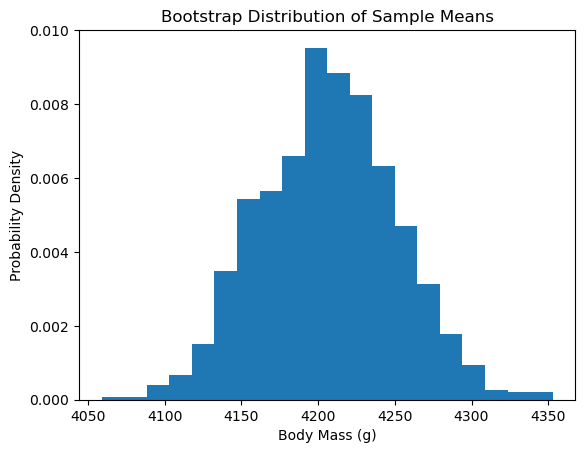

95% Confidence Interval for the Mean: [4122.73460961 4293.4740991 ]
95% Confidence Interval for the Median: [3900. 4200.]


In [2]:
4. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data (using penguins dataset as an example)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)
penguins = penguins[['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'sex', 'body_mass_g']].dropna()

# Convert necessary columns to integers
penguins['body_mass_g'] = penguins['body_mass_g'].astype(int)

# Select the column you're interested in for the population mean calculation
data = penguins['body_mass_g']

# Bootstrap resampling for the population mean
# Number of times to bootstrap the sample
reps = 1000

# What is your sample size
sample_size = len(data)

# Make an array to save the values
bootstrapped_population_sample_means = np.zeros(reps)

# Make a random seed
np.random.seed(130)

# Loop through the number of reps
for i in range(reps):
    # Take a sample from the population
    my_bootstrapped_sample = np.random.choice(data, size=sample_size, replace=True)
    
    # Calculate the mean and add it to the array
    bootstrapped_population_sample_means[i] = my_bootstrapped_sample.mean()

# Plot the bootstrap sample means
fig = plt.figure()
plt.hist(bootstrapped_population_sample_means, bins=20, density=True)
plt.title('Bootstrap Distribution of Sample Means')
plt.xlabel('Body Mass (g)')
plt.ylabel('Probability Density')
plt.show()

# 95 percent confidence interval for the mean
mean_confidence_interval = np.quantile(bootstrapped_population_sample_means, [0.025, 0.975])
print("95% Confidence Interval for the Mean:", mean_confidence_interval)

# To change this to compute the 95% confidence interval for the population median:
# Make an array to save the values
bootstrapped_population_sample_medians = np.zeros(reps)

# Loop through the number of reps
for i in range(reps):
    # Take a sample from the population
    my_bootstrapped_sample = np.random.choice(data, size=sample_size, replace=True)
    
    # Calculate the median and add it to the array
    bootstrapped_population_sample_medians[i] = np.median(my_bootstrapped_sample)

# 95 percent confidence interval for the median
median_confidence_interval = np.quantile(bootstrapped_population_sample_medians, [0.025, 0.975])
print("95% Confidence Interval for the Median:", median_confidence_interval)



 We discussed how to create Python code to compute a 95% bootstrap confidence interval for a population mean. I explained the steps involved in performing bootstrap sampling, calculating the confidence interval, and provided a fully commented code example that can easily be modified to calculate confidence intervals for other population parameters, such as the median.
If you need further details or more specific excerpts, let me know!
https://chatgpt.com/share/66fc809a-da90-8007-950e-6bf54c33904f

5.Because confidence intervals estimate the range where the true population parameter is likely to fall, based on the sample statistic. The sample statistic (e.g., sample mean) is a point estimate from a subset of the population


Here's a concise summary of our exchanges for your homework assignment:

Data Manipulation in Python: We discussed data manipulation techniques using pandas, where I helped you learn about key functionalities such as filtering, grouping, and transforming data to support your growing interest in Python programming.
Accounting Studies: We explored topics related to accounting as you expressed interest in becoming an accountant. This included discussions on practical accounting methods, financial statements, and key concepts you might need to master for the profession.
Calculus Applications: You were interested in how calculus can solve real-world problems, particularly how it might intersect with fields like accounting or business. I explained its relevance in optimizing processes and calculating rates of change, providing examples like cost minimization and profit maximization.
Confidence Intervals: We clarified the distinction between population parameters and sample statistics in the context of confidence intervals. I explained how confidence intervals help estimate population parameters based on sample data, reflecting the uncertainty in those estimates.
If you'd like any further details or clarification, feel free to ask!
https://chatgpt.com/share/66fc85df-3eb8-8007-a59f-e4d31f8cf1a0

6.
1）Imagine you have a small set of data from a population, and you are trying to figure out what the average or some other stat would look like if you had more data. But instead of actually gathering more data which can be expensive or time-consuming, you “resample” the data you already have. You pick random values from your sample, but here’s the twist: you allow repeats, so the same value can show up more than once. You do this resampling many, many times, each time calculating the statistic you care about. By the end, you have a bunch of stats that help you see what the range of possible outcomes looks like.
2）To estimate how much your sample data can tell you about the whole population without needing complicated math or making strict assumptions
3）You have a set of numbers.
  Randomly pick numbers from your sample (with repeats), then calculate the average of that new set. Maybe do it 1,000 or 10,000 times, so you end up with a bunch of averages. You now have a whole bunch of estimates of what the average could be based on your sample.And then check whether your original guess falls within the range of the averages you got from bootstrapping. If your guess is inside that range, it’s possible that your guess is right. If it’s outside, then your guess might be off.

7.A confidence interval overlapping zero means that zero is a possible value for the population parameter (such as the effect of a drug). The null hypothesis, cannot be rejected because the data is consistent with there being no effect.Even though the observed sample mean isn’t zero, the confidence interval gives a range of plausible values for the true population mean, and if zero is included in this range, then there isn’t enough evidence to confidently say the effect isn’t zero. If the confidence interval does not include zero, this means that the range of plausible values for the population parameter does not include the null hypothesis (which says the effect is zero). In this case, we have enough evidence to suggest that the true effect isn’t zero, meaning the drug likely has an effect.

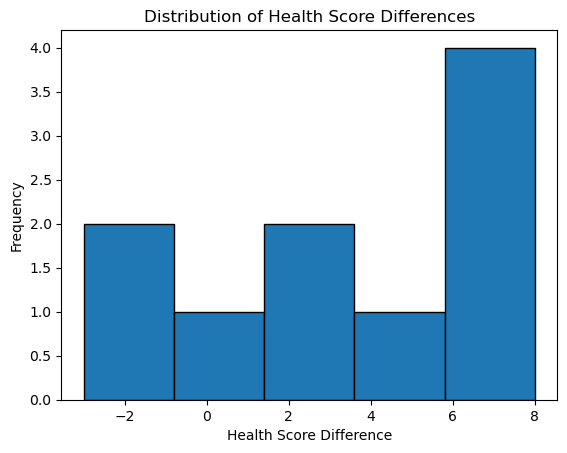

95% Confidence Interval for Mean Health Score Difference: [0.8 5.5]


In [2]:
8.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(78)

data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}


df = pd.DataFrame(data)


df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']


def bootstrap_mean(data, num_bootstrap=10000):
    boot_means = []
    for _ in range(num_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return np.percentile(boot_means, [2.5, 97.5])


confidence_interval = bootstrap_mean(df['HealthScoreDifference'])


plt.hist(df['HealthScoreDifference'], bins=5, edgecolor='k')
plt.title('Distribution of Health Score Differences')
plt.xlabel('Health Score Difference')
plt.ylabel('Frequency')
plt.show()


print("95% Confidence Interval for Mean Health Score Difference:", confidence_interval)


9.yes